In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os

varrho = 448
gamma_3_length = 5
A_d = 0.12
A_g = 0.10
beta = 1.86 / 1000
eta = 0.17


In [3]:
IntPeriod = 60
timespan = 12
Months = IntPeriod * timespan
time_vec = np.linspace(0,IntPeriod,Months)

In [4]:
def load_txt_files(folder_name):
    data_dict = {}
    for filename in os.listdir(folder_name):
        if filename.endswith(".txt") and "params.txt" not in filename:
            key = filename[:-4] # remove ".txt" extension from file name
            file_path = os.path.join(folder_name, filename)
            data_dict[key] = np.loadtxt(file_path)[0:IntPeriod * timespan] 
            
    data_dict["I_g"] =  np.exp(data_dict['log_K_simulation']) * data_dict['R_simulation'] * data_dict['i_g_simulation']
    data_dict["I_d"] =  np.exp(data_dict['log_K_simulation']) * (1.0 - data_dict['R_simulation'])  * data_dict['i_d_simulation']
    data_dict["I_I/Y"] =  np.exp(data_dict['log_K_simulation']) * data_dict['i_I_simulation'] /  \
    (np.exp(data_dict['log_K_simulation']) * data_dict['R_simulation'] * A_d + \
     np.exp(data_dict['log_K_simulation']) * (1.0 - data_dict['R_simulation']) * A_g)
    data_dict["E"] = eta * np.exp(data_dict['log_K_simulation']) * (1.0 - data_dict['R_simulation'] ) * A_d
    
    data_dict['K_g'] = np.exp(data_dict['log_K_simulation']) * data_dict['R_simulation']
    data_dict['K_d'] = np.exp(data_dict['log_K_simulation']) * (1.0 - data_dict['R_simulation'])
    dt  = 1/12
    r_1         = 1.5
    r_2         = 2.5
    y_lower_bar = 1.5
    I_g        =  np.exp(data_dict['log_I_g_simulation'])
    g          =  data_dict['g_simulation']
    integrand  =  I_g / varrho * g * dt 
    integral   = -np.cumsum(integrand)
    distorted_probability = 1.0 - np.exp(integral)
    data_dict['distorted_probability_tech']  = distorted_probability


    I_g        =  np.exp(data_dict['log_I_g_simulation'])
    g          =  data_dict['g_simulation']
    integrand  =  I_g / varrho * dt 
    integral   = -np.cumsum(integrand)
    baseline_probability = 1.0 - np.exp(integral)
    data_dict['baseline_probability_tech']  = baseline_probability

    
    data_dict['damage_jump_intensity'] =  r_1 * ( np.exp( r_2 / 2 * np.power( data_dict['T_simulation'] - y_lower_bar,2) ) - 1  ) * (data_dict['T_simulation']  > y_lower_bar )

    for i in range(1, gamma_3_length+1):
        data_dict['distorted_damage_jump_prob_' + str(i)] =  1-np.exp(-np.cumsum(data_dict['damage_jump_intensity'] 
                                                                             * data_dict['f_m_' + str(i) + '_simulation'] * dt))
        
    data_dict['damage_jump_prob'] = 1-np.exp(-np.cumsum(data_dict['damage_jump_intensity'] * dt))

    pattern = 'f_m_{}_simulation'
    sum_array = np.zeros_like(data_dict[pattern.format(1)])
    for i in range(1, gamma_3_length+1):
        key = pattern.format(i)
        sum_array += data_dict[key]
    data_dict['f_m_sum'] = sum_array

    # Loop through the keys and normalize the corresponding arrays
    for i in range(1, gamma_3_length + 1):
        f_m_key = 'f_m_{}_simulation'.format(i)
        f_m_norm_key = 'f_m_{}_normalized'.format(i)
        data_dict[f_m_norm_key] = data_dict[f_m_key] / data_dict['f_m_sum']
        
    
    
    pattern = 'f_m_{}_simulation'
    sum_array = np.zeros_like(data_dict[pattern.format(1)])
    for i in range(1, gamma_3_length+1):
        key = pattern.format(i)
        sum_array += data_dict[key]
    data_dict['f_m_sum'] = sum_array

    # Loop through the keys and normalize the corresponding arrays
    for i in range(1, gamma_3_length + 1):
        f_m_key = 'f_m_{}_simulation'.format(i)
        f_m_norm_key = 'f_m_{}_normalized'.format(i)
        data_dict[f_m_norm_key] = data_dict[f_m_key] / data_dict['f_m_sum']
        
    
    # Select the keys to plot
    keys_to_plot = ['f_m_{}_normalized'.format(i) for i in range(1, gamma_3_length+1)]

    
    ## Plot bar chart
    baseline = np.ones(gamma_3_length) / gamma_3_length
    
    

    pattern = 'f_m_{}_normalized'
    distorted = np.stack([data_dict[pattern.format(i)][-1] for i in range(1, gamma_3_length+1)])

    data_dict["distorted_normalized_damage_prob"] = distorted
    data_dict["baseline_normalized_damage_prob"] = baseline

    return data_dict

In [5]:

def distorted_damage_jump_prob(data_dict):


    # Select the keys to plot

    keys_to_plot = ["distorted_damage_jump_prob_" + str(i) for i in range(1, gamma_3_length + 1)]
    keys_to_plot.append( 'damage_jump_prob' )
    
    # Create a figure with larger size
    fig, ax = plt.subplots(figsize=(10,6))

    # Plot the keys
    for key in keys_to_plot:
        ax.plot(data_dict[key], label=key)

    # Set x limits
    #ax.set_xlim([0, len(data_dict['damage_jump_intensity'])])
    # Add labels and legend
    plt.xlabel('Time')
    plt.ylabel('Probability')
    plt.title('Damage Jump Probability')
    plt.legend()

    # Show the plot
    plt.show()

def f_m_norm(data_dict):
    


    # Select the keys to plot
    keys_to_plot = ['f_m_{}_normalized'.format(i) for i in range(1, gamma_3_length+1)]


    # Create a figure with larger size
    fig, ax = plt.subplots(figsize=(10,6))

    # Plot the keys
    for key in keys_to_plot:
        ax.plot(data_dict[key], label=key)

    # Set x limits
    #ax.set_xlim([0, len(data_dict['damage_jump_intensity'])])
    # Add labels and legend
    plt.xlabel('Time')
    plt.ylabel('Probability')
    plt.title('Damage Jump Probability')
    plt.legend()

    # Show the plot
    plt.show()

    
def f_m_norm_bar(data_dict):
    data_dict['f_m_sum'] = data_dict['f_m_1_simulation'] + data_dict['f_m_2_simulation'] + data_dict['f_m_3_simulation'] + data_dict['f_m_4_simulation'] + data_dict['f_m_5_simulation']

    # Loop through the keys and normalize the corresponding arrays
    for i in range(1, 6):
        f_m_key = 'f_m_{}_simulation'.format(i)
        f_m_norm_key = 'f_m_{}_normalized'.format(i)
        data_dict[f_m_norm_key] = data_dict[f_m_key] / data_dict['f_m_sum']
        
    
    ## Plot bar chart
    baseline = np.ones(5) / 5
    distorted = np.array([ data_dict['f_m_1_normalized'][-1], data_dict['f_m_2_normalized'][-1],
                         data_dict['f_m_3_normalized'][-1], data_dict['f_m_4_normalized'][-1], data_dict['f_m_5_normalized'][-1]])
#     x1       = np.array(list(range(5)))
    x1       = np.linspace(0,1/3,5)
    plt.bar(x1,baseline, width=(1/3)*(1/4), label='Baseline', color = 'C3', alpha=0.5, ec="darkgrey")
    plt.bar(x1, distorted, width=(1/3)*(1/4), label='Distorted', color = 'C0', alpha=0.5, ec="darkgrey")
#     plt.hist(baseline, color = 'C3', alpha=0.5, ec="darkgrey")
#     plt.hist(distorted, color = 'C0', alpha=0.5, ec="darkgrey")

    plt.ylim(0,0.5)
    plt.title("Distorted Probability of Damage Models")
    plt.xlabel(r"$\gamma_3$")
#     plt.show()
    plt.savefig('Dmg_Dist_IMSI_2023.png')

    
def h_hist(data_dict,  width_bins = 10e-3):
    beta_f =  1.86 / 1000
    varsigma = 1.2 * 1.86 / 1000
#     bin_edges = np.arange(np.min(theta_ell),  np.max(theta_ell),  width_bins)
#     plt.hist(theta_ell + varsigma * data_dict['h_simulation'][-1], bins = bin_edges, alpha=0.5)
#     plt.hist(theta_ell, bins = bin_edges, alpha=0.5)
    bin_edges = np.arange(np.min(theta_ell),  np.max(theta_ell),  width_bins)
    plt.hist(1000*theta_ell, bins = np.linspace(0.8,3.,16), color = 'C3', alpha=0.5, ec="darkgrey")
    plt.hist(1000*(theta_ell + varsigma * data_dict['h_simulation'][-1]), bins = np.linspace(0.8,3.,16), color = 'C0', alpha=0.5, ec="darkgrey")
    plt.ylim(0,30)
    plt.title("Distorted Probability of Climate Models")
    plt.xlabel("Climate Sensitivity")
#     plt.show()
    plt.savefig('Climate_Dist_IMSI_2023.png')
#     plt.savefig()
    

def plot_subplots(data_dict, keys, titles, num_columns=3, figsize=(14, 8)):
    num_rows = int(np.ceil(len(keys) / num_columns))
    fig, axs = plt.subplots(num_rows, num_columns, figsize=figsize)
    subplot_size = fig.get_size_inches() / np.array([num_columns, num_rows])
    for i, (key, title) in enumerate(zip(keys, titles)):
        row = i // num_columns
        col = i % num_columns
        ax = axs[row, col]
        ax.set_title(title)
        ax.plot(data_dict[key])
        ax.set_xlabel('month')
    fig.subplots_adjust(hspace=1.2, wspace=0.2)
    plt.show()


In [6]:
import pandas as pd
url = 'https://raw.githubusercontent.com/SuriChen1028/TwoCapital/main/data/model144.csv'

theta_ell = (pd.read_csv(url, header=None).to_numpy()[:,0]/1000).astype(np.float32)


In [7]:
# distorted_damage_jump_prob(data_dict)

# Comparative statics

In [12]:
# folder_name = "A_g_prime_03_psi_01/pre_damage_pre_tech"
# data_dict_1 = load_txt_files(folder_name)
# folder_name = "A_g_prime_03_psi_02/pre_damage_pre_tech"
# data_dict_2 = load_txt_files(folder_name)
# folder_name = "A_g_prime_03_psi_03/pre_damage_pre_tech"
# data_dict_3 = load_txt_files(folder_name)
# folder_name = "A_g_prime_03_psi_04/pre_damage_pre_tech"
# data_dict_4 = load_txt_files(folder_name)

# folder_name = "A_g_prime_015_psi_01/pre_damage_pre_tech"
# data_dict_1 = load_txt_files(folder_name)
# folder_name = "A_g_prime_015_psi_02/pre_damage_pre_tech"
# data_dict_2 = load_txt_files(folder_name)
# folder_name = "A_g_prime_015_psi_03/pre_damage_pre_tech"
# data_dict_3 = load_txt_files(folder_name)
# folder_name = "A_g_prime_015_psi_04/pre_damage_pre_tech"
# data_dict_4 = load_txt_files(folder_name)


folder_name = "SAET_2023_charts/model_0"
data_dict_1 = load_txt_files(folder_name)

folder_name = "SAET_2023_charts/model_3"
data_dict_4 = load_txt_files(folder_name)

In [13]:
# IntPeriod = 30
# timespan = 12
# Months = IntPeriod * timespan
# time_vec = np.linspace(0,IntPeriod,Months)

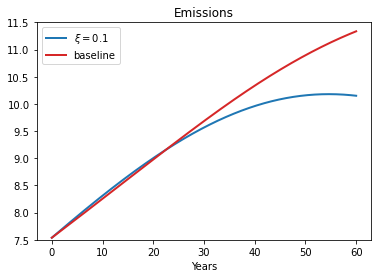

In [33]:
plt.figure()
plt.plot(time_vec,data_dict_1["E"], label = r"$\xi = 0.1$", color = 'tab:blue', linewidth='2')
# plt.plot(time_vec,data_dict_2["E"], label = r"$\xi = 0.5$")
# plt.plot(time_vec,data_dict_3["E"], label = r"$\xi = 1.0$")
plt.plot(time_vec,data_dict_4["E"], label = "baseline", color = 'tab:red', linewidth='2')
plt.xlabel('Years')
plt.title("Emissions")
plt.ylim(7.5,11.5)
# plt.xlim(0,IntPeriod)
plt.legend(loc='upper left')

plt.savefig('Ems_Comp_IMSI_2023.png')

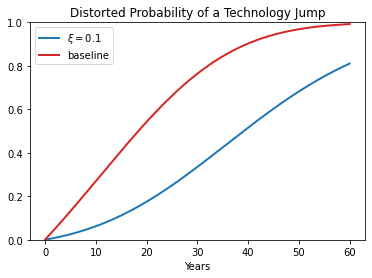

In [15]:
plt.figure()
plt.plot(time_vec,data_dict_1["distorted_probability_tech"], label = r"$\xi = 0.1$", color = 'tab:blue', linewidth='2')
# plt.plot(time_vec,data_dict_2["distorted_probability_tech"], label = r"$\xi = 0.5$")
# plt.plot(data_dict_3["distorted_probability_tech"], label = r"$\xi = 1.0$")
plt.plot(time_vec,data_dict_4["distorted_probability_tech"], label = 'baseline', color = 'tab:red', linewidth='2')
plt.xlabel('Years')
plt.title("Distorted Probability of a Technology Jump")
plt.ylim(0,1)
# plt.xlim(0,IntPeriod)
plt.legend(loc='upper left')

plt.savefig('TechJumpProb_Comp_IMSI_2023.png')

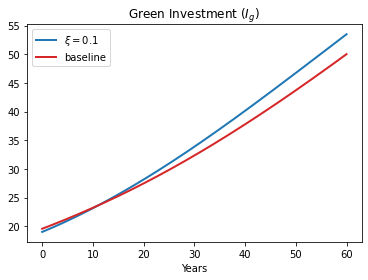

In [16]:
plt.figure()
# plt.plot(data_dict_1["I_g"], label = r"$\xi = 0.15$")
plt.plot(time_vec,data_dict_1["I_g"], label = r"$\xi = 0.1$", color = 'tab:blue', linewidth='2')
# plt.plot(time_vec,data_dict_2["I_g"], label = r"$\xi = 0.5$")
# plt.plot(time_vec,data_dict_3["I_g"], label = r"$\xi = 1.0$")
plt.plot(time_vec,data_dict_4["I_g"], label = 'baseline', color = 'tab:red', linewidth='2')
# plt.title(r"$I_g$")
plt.xlabel('Years')
plt.title(r"Green Investment ($I_g$)")
# plt.ylim(0,1)
# plt.xlim(0,IntPeriod)
plt.legend(loc='upper left')

plt.savefig('Ig_Comp_IMSI_2023.png')

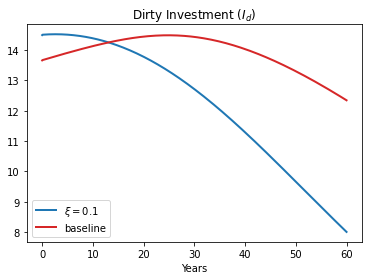

In [61]:
plt.figure()
#plt.plot(data_dict_1["I_d"], label = r"$\xi = 0.15$")
plt.plot(time_vec,data_dict_1["I_d"], label = r"$\xi = 0.1$", color = 'tab:blue', linewidth='2')
# plt.plot(time_vec,data_dict_2["I_d"], label = r"$\xi = 0.5$")
# plt.plot(data_dict_3["I_d"], label = r"$\xi = 1.0$")
plt.plot(time_vec,data_dict_4["I_d"], label = 'baseline', color = 'tab:red', linewidth='2')
plt.xlabel('Years')
plt.title(r"Dirty Investment ($I_d$)")
# plt.ylim(0,1)
# plt.xlim(0,IntPeriod)
plt.legend(loc='lower left')

plt.savefig('Id_Comp_IMSI_2023.png')

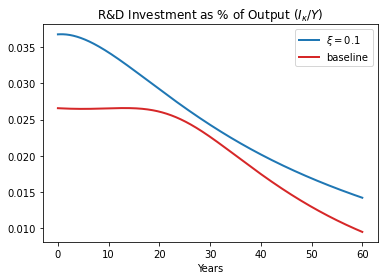

In [60]:
plt.figure()
#plt.plot(data_dict_1["I_I/Y"], label = r"$\xi = 0.15$")
plt.plot(time_vec,data_dict_1["I_I/Y"], label = r"$\xi = 0.1$", color = 'tab:blue', linewidth='2')
# plt.plot(data_dict_2["I_I/Y"], label = r"$\xi = 0.5$")
# plt.plot(data_dict_3["I_I/Y"], label = r"$\xi = 1.0$")
plt.plot(time_vec,data_dict_4["I_I/Y"], label = 'baseline', color = 'tab:red', linewidth='2')
# plt.title(r"$I_I/Y$")
plt.xlabel('Years')
plt.title(r"R&D Investment as % of Output ($I_{\kappa}/Y$)")
# plt.ylim(0,1)
# plt.xlim(0,IntPeriod)
plt.legend(loc='upper right')

plt.savefig('RD_Comp_IMSI_2023.png')

In [19]:
# plt.figure()
# #plt.plot(data_dict_1["I_I/Y"], label = r"$\xi = 0.15$")
# plt.plot(data_dict_1["I_I"], label = r"$\xi = 0.2$", color = 'tab:blue', linewidth='2')
# # plt.plot(data_dict_2["I_I/Y"], label = r"$\xi = 0.5$")
# # plt.plot(data_dict_3["I_I/Y"], label = r"$\xi = 1.0$")
# plt.plot(data_dict_4["I_I"], label = 'baseline', color = 'tab:red', linewidth='2')
# # plt.title(r"$I_I/Y$")
# plt.xlabel('Years')
# plt.title(r"R&D Investment ($I_{\kappa}$)")
# # plt.ylim(0,1)
# # plt.xlim(0,IntPeriod)
# plt.legend(loc='upper right')

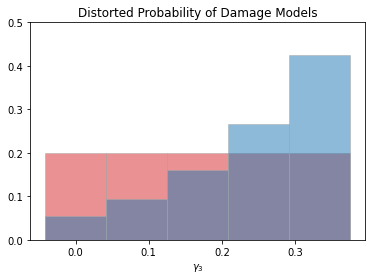

In [20]:
# x1       = np.array(list(range(gamma_3_length)))
# plt.bar(x1,data_dict_1["distorted_normalized_damage_prob"], width=0.4, label = r"$\xi = 0.2$", alpha = 0.5)
# plt.bar(x1,data_dict_4["baseline_normalized_damage_prob"], width=0.4, label =  "baseline", alpha = 0.5)
# plt.legend()

f_m_norm_bar(data_dict_1)
# plt.savefig('Dmg_Dist_IMSI_2023.png')

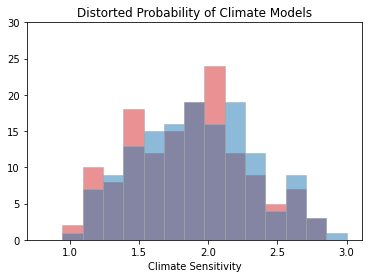

In [21]:
h_hist(data_dict_1, width_bins = 0.000125)
plt.savefig('Climate_Dist_IMSI_2023.png')

In [22]:
# data_dict['distorted_damage_jump_prob_1']   
# data_dict['damage_jump_prob']
data_dict_1['distorted_damage_jump_prob_avg'] = (1/5)*(data_dict_1['distorted_damage_jump_prob_1']+data_dict_1['distorted_damage_jump_prob_2']+data_dict_1['distorted_damage_jump_prob_3']+data_dict_1['distorted_damage_jump_prob_4']+data_dict_1['distorted_damage_jump_prob_5'])

In [23]:
for i in range(1, gamma_3_length+1):
        data_dict_1['distorted_damage_jump_intensity_' + str(i)] =  data_dict_1['damage_jump_intensity'] \
                                                                             * data_dict_1['f_m_' + str(i) + '_simulation']

            

In [24]:
data_dict_1['distorted_damage_jump_intensity'] = (1/5)*(data_dict_1['distorted_damage_jump_intensity_1']
                                                       +data_dict_1['distorted_damage_jump_intensity_2']
                                                       +data_dict_1['distorted_damage_jump_intensity_3']
                                                       +data_dict_1['distorted_damage_jump_intensity_4']
                                                       +data_dict_1['distorted_damage_jump_intensity_5'])

In [25]:
data_dict_1['distorted_damage_jump_prob'] = 1-np.exp(-np.cumsum(data_dict_1['distorted_damage_jump_intensity'] * (1/12)))


In [53]:
data_dict_1['f_m_avg'] = (1/5)*(data_dict_1['f_m_1_simulation']
                                                       +data_dict_1['f_m_2_simulation']
                                                       +data_dict_1['f_m_3_simulation']
                                                       +data_dict_1['f_m_4_simulation']
                                                       +data_dict_1['f_m_5_simulation'])



In [54]:
data_dict_1['distorted_dmg_jump_intensity'] = data_dict_1['f_m_avg']*data_dict_1['damage_jump_intensity']

In [55]:
data_dict_1['distorted_dmg_jump_prob'] = 1-np.exp(-np.cumsum(data_dict_1['distorted_dmg_jump_intensity'] * (1/12)))


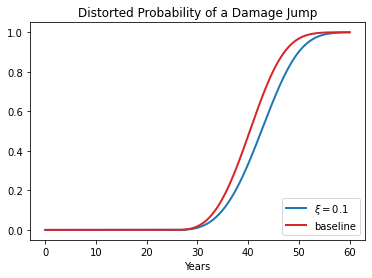

In [56]:
plt.figure()
plt.plot(time_vec,data_dict_1['distorted_dmg_jump_prob'], label = r"$\xi = 0.1$", color = 'tab:blue', linewidth='2')
plt.plot(time_vec,data_dict_4["damage_jump_prob"], label = 'baseline', color = 'tab:red', linewidth='2')
plt.xlabel('Years')
plt.title("Distorted Probability of a Damage Jump")
# plt.ylim(0,1)
# plt.xlim(0,IntPeriod)

plt.legend(loc='lower right')

plt.savefig('DmgJumpProb_Comp_IMSI_2023.png')

In [30]:
data_dict_1['f_m_avg']

array([0.43966365, 0.43966365, 0.43987737, 0.44009385, 0.44030957,
       0.44052666, 0.44074382, 0.44095824, 0.44118103, 0.44140514,
       0.44162424, 0.44184183, 0.44206638, 0.44229378, 0.4425155 ,
       0.44274657, 0.44297607, 0.4432027 , 0.44343925, 0.44366267,
       0.44390066, 0.44413285, 0.44436858, 0.44460191, 0.44484035,
       0.44507309, 0.44531698, 0.44555249, 0.44579324, 0.44603672,
       0.44628033, 0.44652503, 0.44676855, 0.447019  , 0.44726371,
       0.44751236, 0.44775906, 0.4480124 , 0.44826289, 0.44851652,
       0.44876994, 0.44902096, 0.44927949, 0.44953643, 0.44979146,
       0.45005184, 0.45031542, 0.45057014, 0.45083758, 0.45109529,
       0.45136058, 0.45163211, 0.45189308, 0.4521598 , 0.4524298 ,
       0.45269138, 0.4529684 , 0.45323913, 0.45351087, 0.45378029,
       0.45405777, 0.45433422, 0.45461047, 0.45488693, 0.45516584,
       0.45544584, 0.45572782, 0.45600314, 0.45629135, 0.45657547,
       0.45686249, 0.45714319, 0.45742761, 0.45771636, 0.45800